## PyTorch Notebook 【第一周】张量的操作与线性回归

In [68]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torch
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

###### 1.Tensor Operation:    
    1)张量的拼接与切分    
       i)torch.cat(tensors, dim):将张量按原有维度进行拼接  
       ii)torch.stack(tensors,dim):在新的维度上对张量进行拼接
       iii)torch.chunk(input,dim,chunks):将按维度进行平均切分，若不能整除最后一份张量小于其他张量
       iv)torch.split(tensor,split_size_or_sections):按维度切分

In [40]:
t = torch.ones((2,3))
t_cat0 = torch.cat([t,t],dim=0)
t_cat1 = torch.cat([t,t],dim=1)
print("t:\n{},t shape:{}".format(t,t.shape))
print("t_cat0:\n{},t_cat0 shape:{}".format(t_cat0,t_cat0.shape))
print("t_cat1:\n{},t_cat1 shape:{}".format(t_cat1,t_cat1.shape))

t:
tensor([[1., 1., 1.],
        [1., 1., 1.]]),t shape:torch.Size([2, 3])
t_cat0:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),t_cat0 shape:torch.Size([4, 3])
t_cat1:
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]),t_cat1 shape:torch.Size([2, 6])


In [41]:
t_stack2 = torch.stack([t,t],dim=2)
print("t_stack2:\n{},t_stack2 shape:{}".format(t_stack2,t_stack2.shape))

#如果维度已经存在则在原有维度之前做一个新的维度

t_stack0 = torch.stack([t,t],dim=0)
print("t_stack0:\n{},t_stack0 shape:{}".format(t_stack0,t_stack0.shape))

t_stack2:
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]),t_stack2 shape:torch.Size([2, 3, 2])
t_stack0:
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]),t_stack0 shape:torch.Size([2, 2, 3])


In [42]:
a = torch.ones((2,5))
list_of_tensors=torch.chunk(a,dim=1,chunks=2)
for idx, t in enumerate(list_of_tensors):
    print("The {} tensor：\n{}，shape is {}".format(idx+1,t,t.shape))

The 1 tensor：
tensor([[1., 1., 1.],
        [1., 1., 1.]])，shape is torch.Size([2, 3])
The 2 tensor：
tensor([[1., 1.],
        [1., 1.]])，shape is torch.Size([2, 2])


In [43]:
list_of_tensors = torch.split(a,[2,1,2],dim=1)
#list中数值之和必须等于指定维度的常数
for idx, t in enumerate(list_of_tensors):
    print("The {} tensor：\n{}，shape is {}".format(idx+1,t,t.shape))

The 1 tensor：
tensor([[1., 1.],
        [1., 1.]])，shape is torch.Size([2, 2])
The 2 tensor：
tensor([[1.],
        [1.]])，shape is torch.Size([2, 1])
The 3 tensor：
tensor([[1., 1.],
        [1., 1.]])，shape is torch.Size([2, 2])


    2)张量的索引
       i）torch.index_select(input,dim,index):按维度进行索引
       ii)torch.masked_select(input,mask):按mask进行索引，返回一维张量

In [45]:
t = torch.randint(0,9,size=(3,3))
idx = torch.tensor([0,2],dtype=torch.long)#torch.long指定类型
t_select = torch.index_select(t,dim=0,index = idx)
print("t:\n{}\nt_select:\n{}".format(t,t_select))

t:
tensor([[5, 6, 2],
        [3, 1, 2],
        [6, 6, 4]])
t_select:
tensor([[5, 6, 2],
        [6, 6, 4]])


In [46]:
mask = t.ge(5)
t_select = torch.masked_select(t,mask)
print("t:\n{}\nmask:\n{}\nt_select:\n{}".format(t,mask,t_select))

t:
tensor([[5, 6, 2],
        [3, 1, 2],
        [6, 6, 4]])
mask:
tensor([[ True,  True, False],
        [False, False, False],
        [ True,  True, False]])
t_select:
tensor([5, 6, 6, 6])


    3）张量变换
       i)torch.reshape(input,shape):变换张量形状，当张量在内存中是连续时，新张量与input共享数据内存
       ii）torch.transpose(input,dim0,dim1):交换张量的两个维度
       iii）torch.t(input)：2维张量转置，对矩阵而言，等价于torch.transpose(input,0,1)
       iv)torch.squeeze(input):压缩长度为1的维度（轴），dim=None则移除所有长度为1的轴，若指定维度当且仅当该轴长度为1时，可以被移除
       v)torch.unsqueeze(input,dim):依据dim扩展维度 

In [50]:
t = torch.randperm(8)
t_reshape = torch.reshape(t,(-1,2,2))
print("t:{}\nt_reshape:\n{}".format(t,t_reshape))

t[0]=111
print("t:{}\nt_reshape:\n{}".format(t,t_reshape))
print("t.data 内存地址：{}".format(id(t.data)))
print("t_reshape.data 内存地址为：{}".format(id(t_reshape.data)))#内存共享

t:tensor([3, 0, 1, 4, 5, 2, 7, 6])
t_reshape:
tensor([[[3, 0],
         [1, 4]],

        [[5, 2],
         [7, 6]]])
t:tensor([111,   0,   1,   4,   5,   2,   7,   6])
t_reshape:
tensor([[[111,   0],
         [  1,   4]],

        [[  5,   2],
         [  7,   6]]])
t.data 内存地址：2361697912368
t_reshape.data 内存地址为：2361697912368


In [53]:
t=torch.rand(2,3,4)
t_transpose = torch.transpose(t,dim0=1,dim1=2)
print("t shape:{}\nt_transpose shape:{}".format(t.shape,t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape:torch.Size([2, 4, 3])


In [61]:
t = torch.rand((1,2,3,1))
t_sq = torch.squeeze(t)
t0 = torch.squeeze(t,dim=0)
t1=torch.squeeze(t,dim=1)#长度不为1所以无法压缩
print(t.shape)
print(t_sq.shape)
print(t0.shape)
print(t1.shape)
t_unsqueeze = torch.unsqueeze(t,dim=2)
print(t_unsqueeze.shape)

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])
torch.Size([1, 2, 1, 3, 1])


###### 2.Tensor Math Operations :  
        1).加减乘除： 
           i)torch.add(input,alpha=1,other):input+alpha*other  
           ii)torch.addcdiv(input,value,tensor1,tensor2):out_i=input_i+value*tensor1_i/tensor2_i   
           iii)torch.addcmul():out_i=input_i+value*tensor1_i/tensor2_i
           iv)torch.sub(),torch.div(),torch.mul()  
        2).对数，指数，幂函数：torch.log(input),torch.log10(input),torch.log2(),torch.exp(input),torch.pow()
        3).三角函数：torch.abs(),torch.acos(),torch.cosh(),torch.cos(),torch.asin(),torch.atan(),torch.atan2()  

###### 3. Linear Regression:


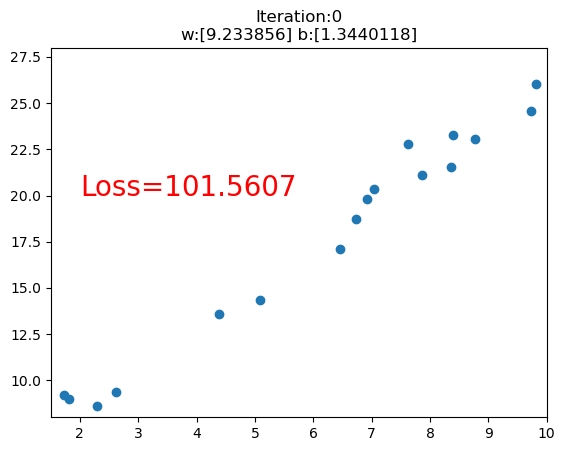

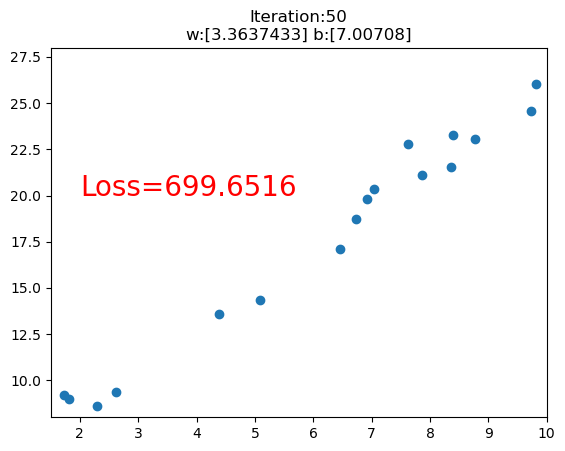

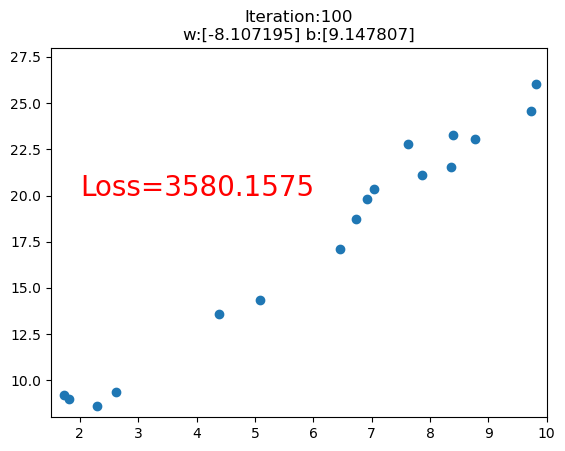

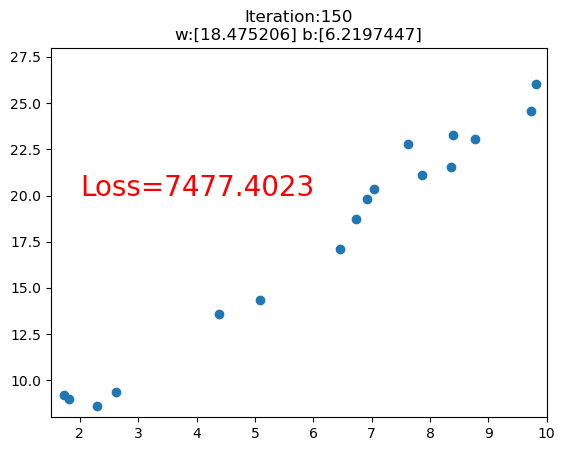

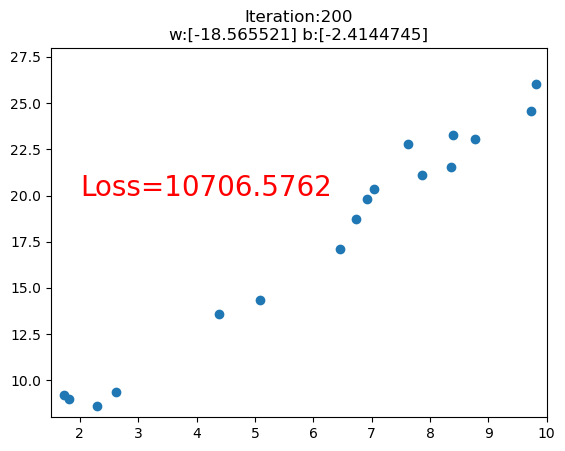

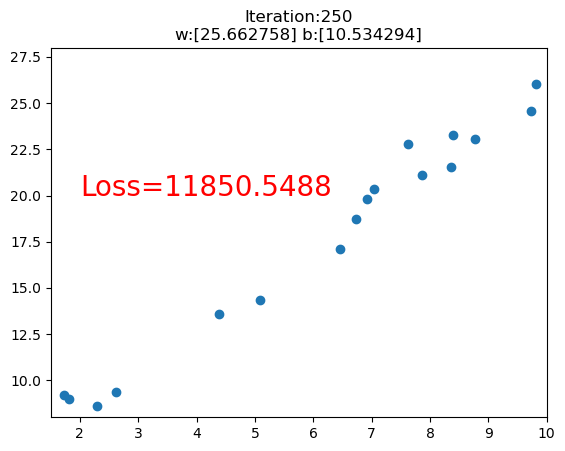

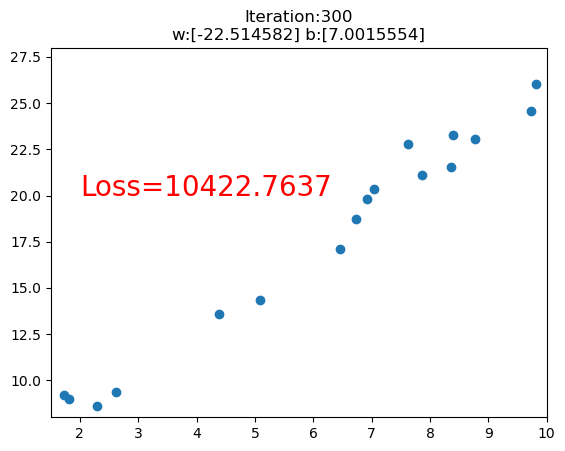

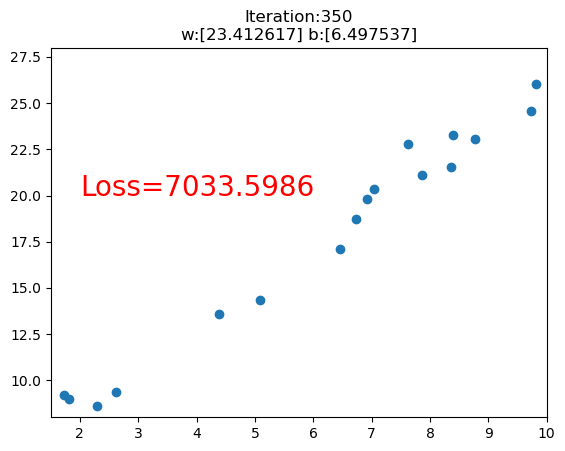

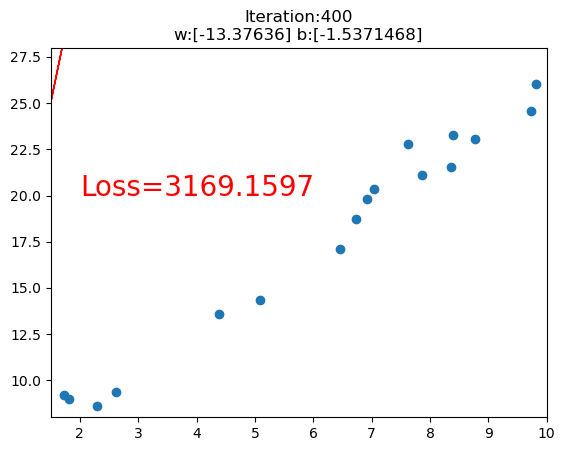

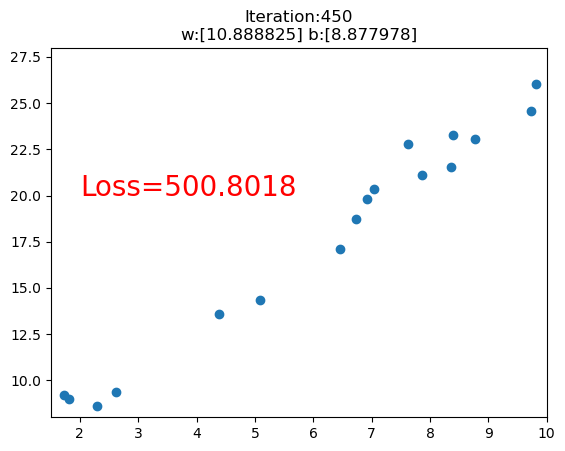

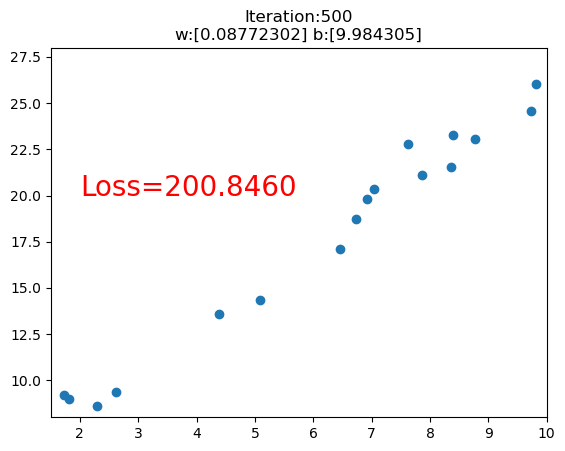

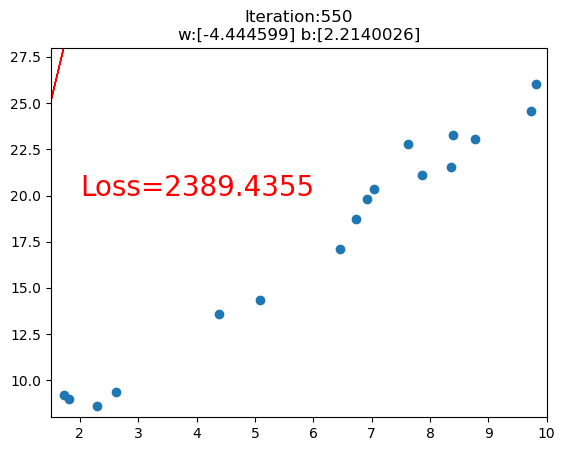

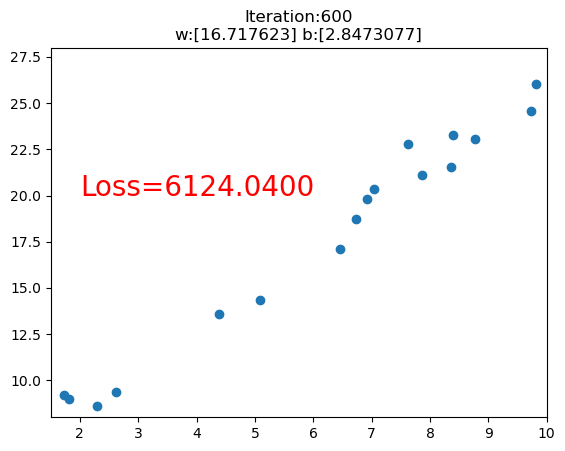

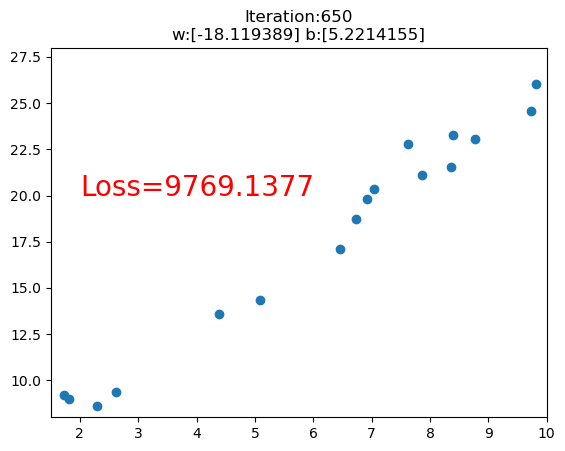

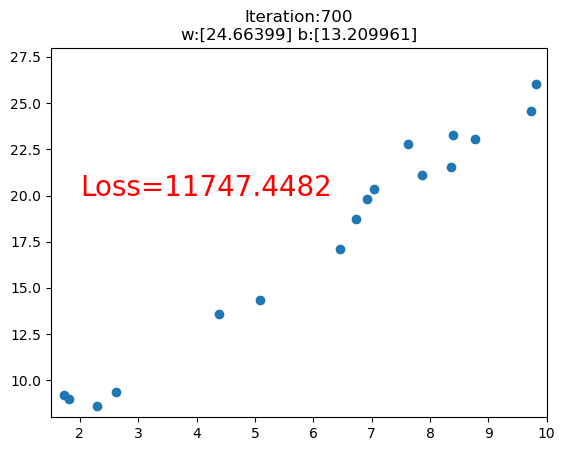

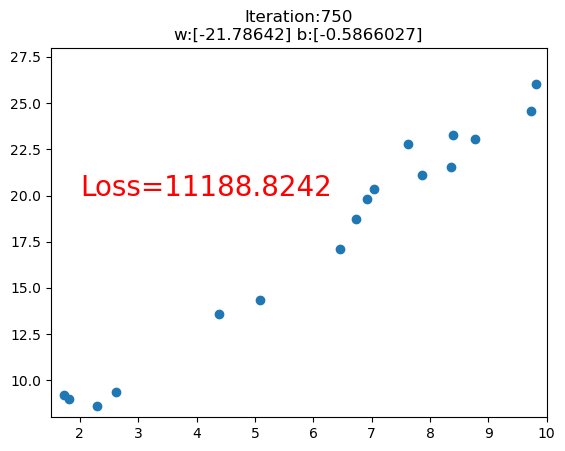

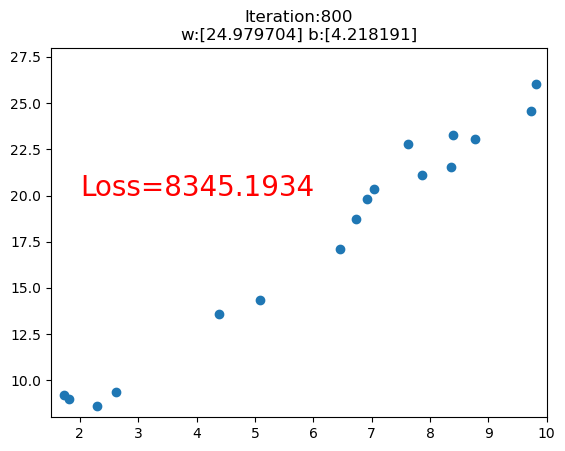

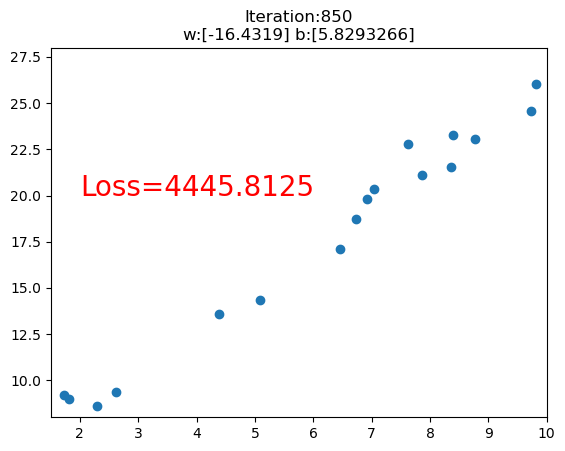

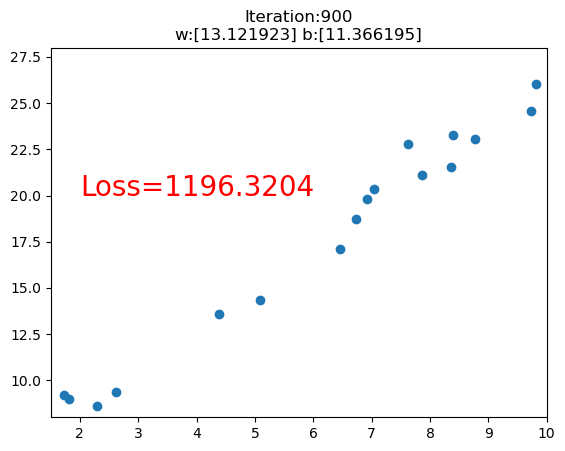

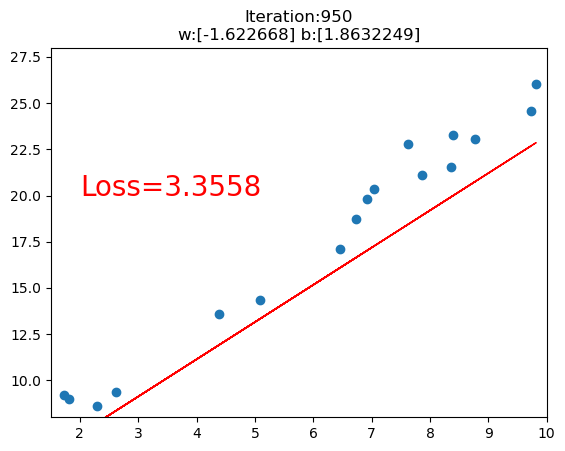

In [80]:
lr = 0.1
#create training set
x = torch.rand(20,1)*10
y=2*x+(5+torch.randn(20,1))

#初始化参数
w=torch.randn((1),requires_grad=True)
b=torch.zeros((1),requires_grad=True)

for n in range(1000):
    wx = torch.mul(w,x)
    y_pred = torch.add(wx,b)
    loss = (0.5*(y-y_pred)**2).mean()
    loss.backward()#back propagation
    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)
    
    if n%50 == 0:
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw=1)
        plt.text(2,20,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.xlim(1.5,10)
        plt.ylim(8,28)
        plt.title("Iteration:{}\nw:{} b:{}".format(n,w.data.numpy(),b.data.numpy()))
        plt.pause(0.5)
        
        if loss.data.numpy()<1:
            break